In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [23]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")

In [24]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='age', ylabel='count'>

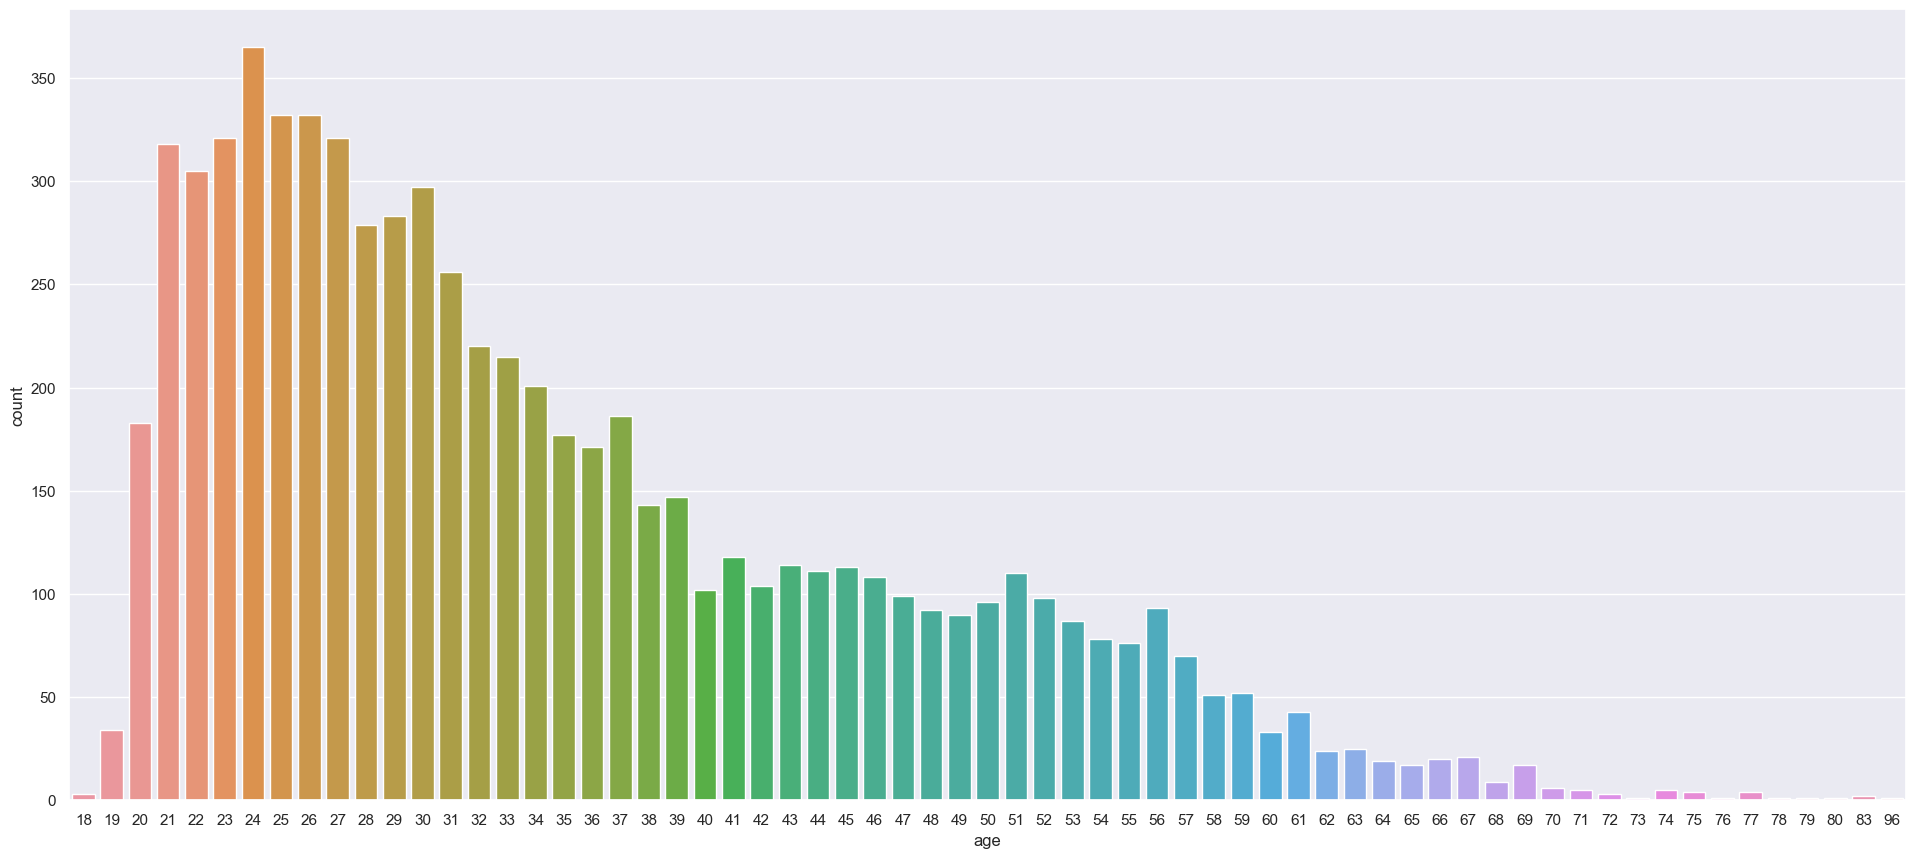

In [25]:
sns.set(rc={'figure.figsize':(23.7,10.27)})
sns.countplot(x=df["age"])

There are 1576 people older than 45
There are 4109 people older than 25, younger than 45
There are 1529 people younger than 25


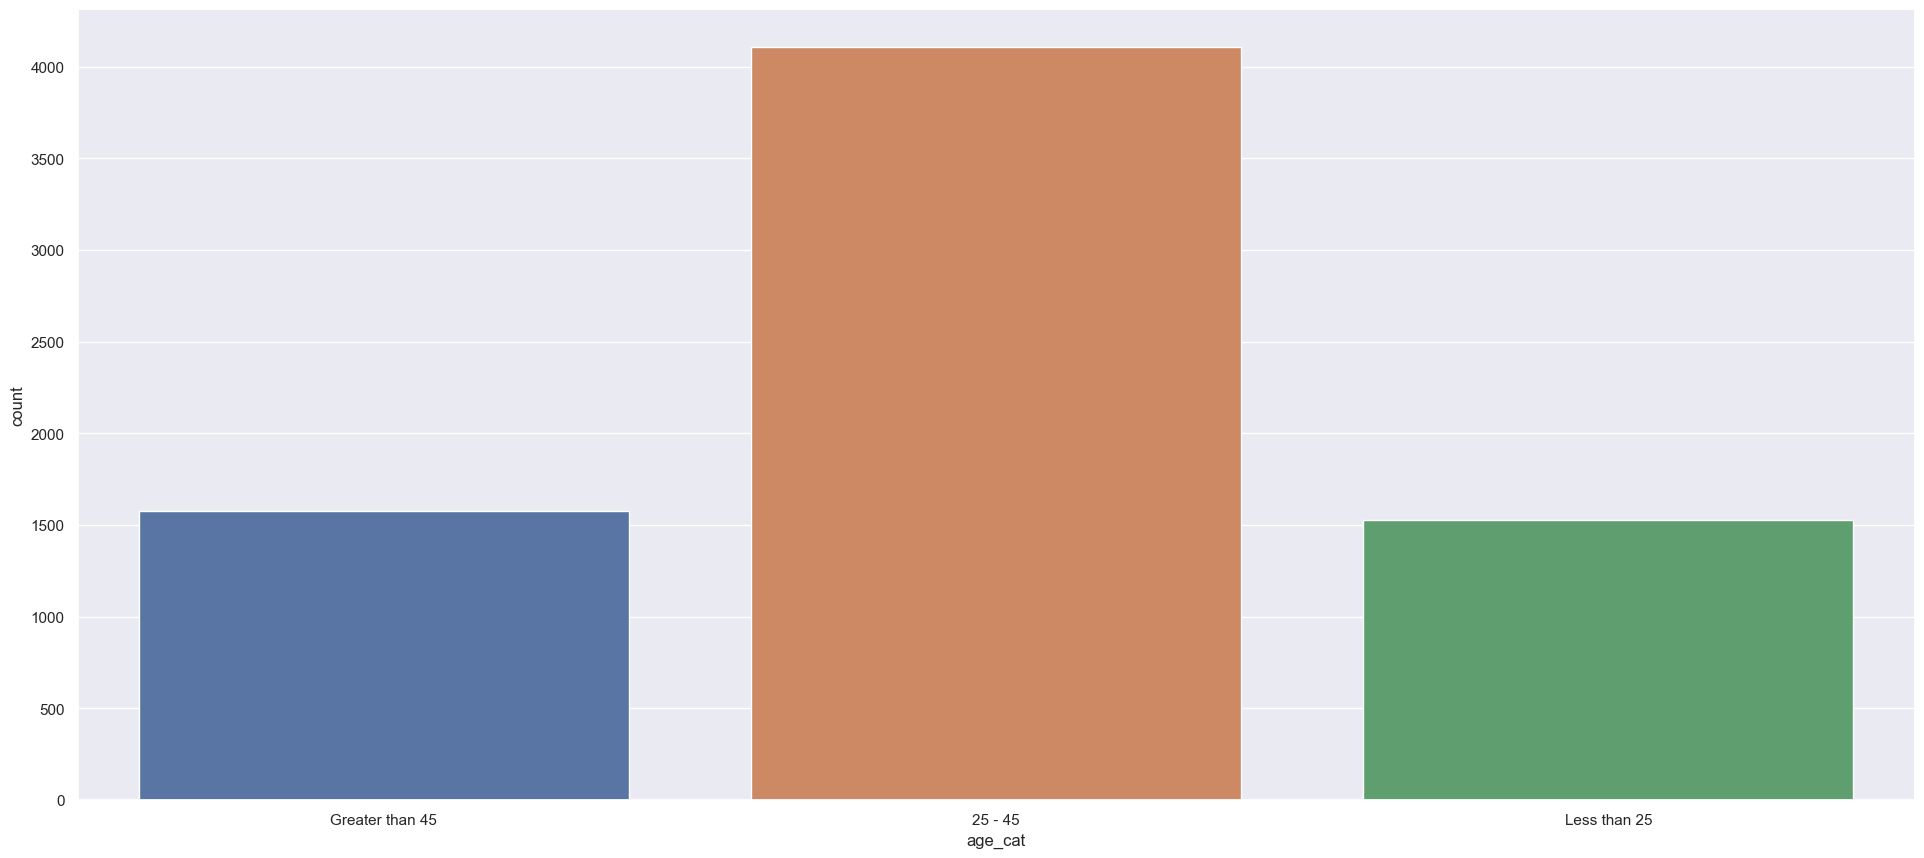

In [26]:
sns.countplot(x=df["age_cat"])
print(f'There are {df["age_cat"].tolist().count("Greater than 45")} people older than 45')
print(f'There are {df["age_cat"].tolist().count("25 - 45")} people older than 25, younger than 45')
print(f'There are {df["age_cat"].tolist().count("Less than 25")} people younger than 25')

<AxesSubplot:xlabel='age', ylabel='Count'>

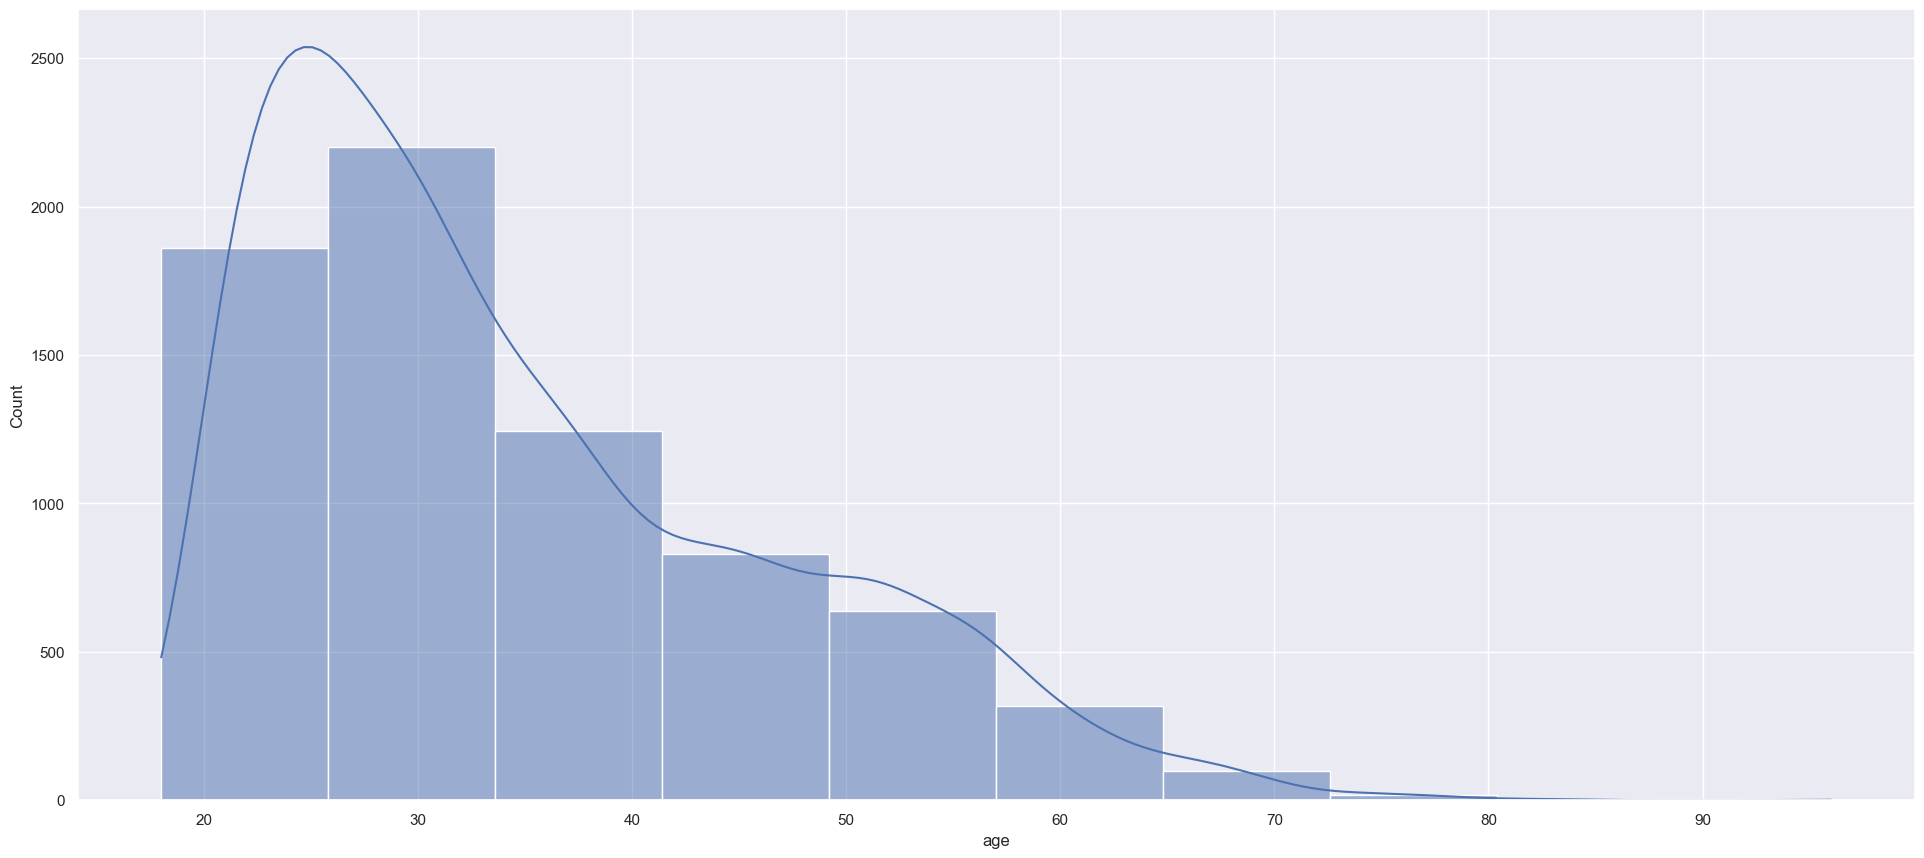

In [27]:
sns.histplot(x=df["age"], kde=True, bins=10)

<AxesSubplot:title={'center':'Jail Time after First Charge'}, xlabel='Days In Jail', ylabel='Age'>

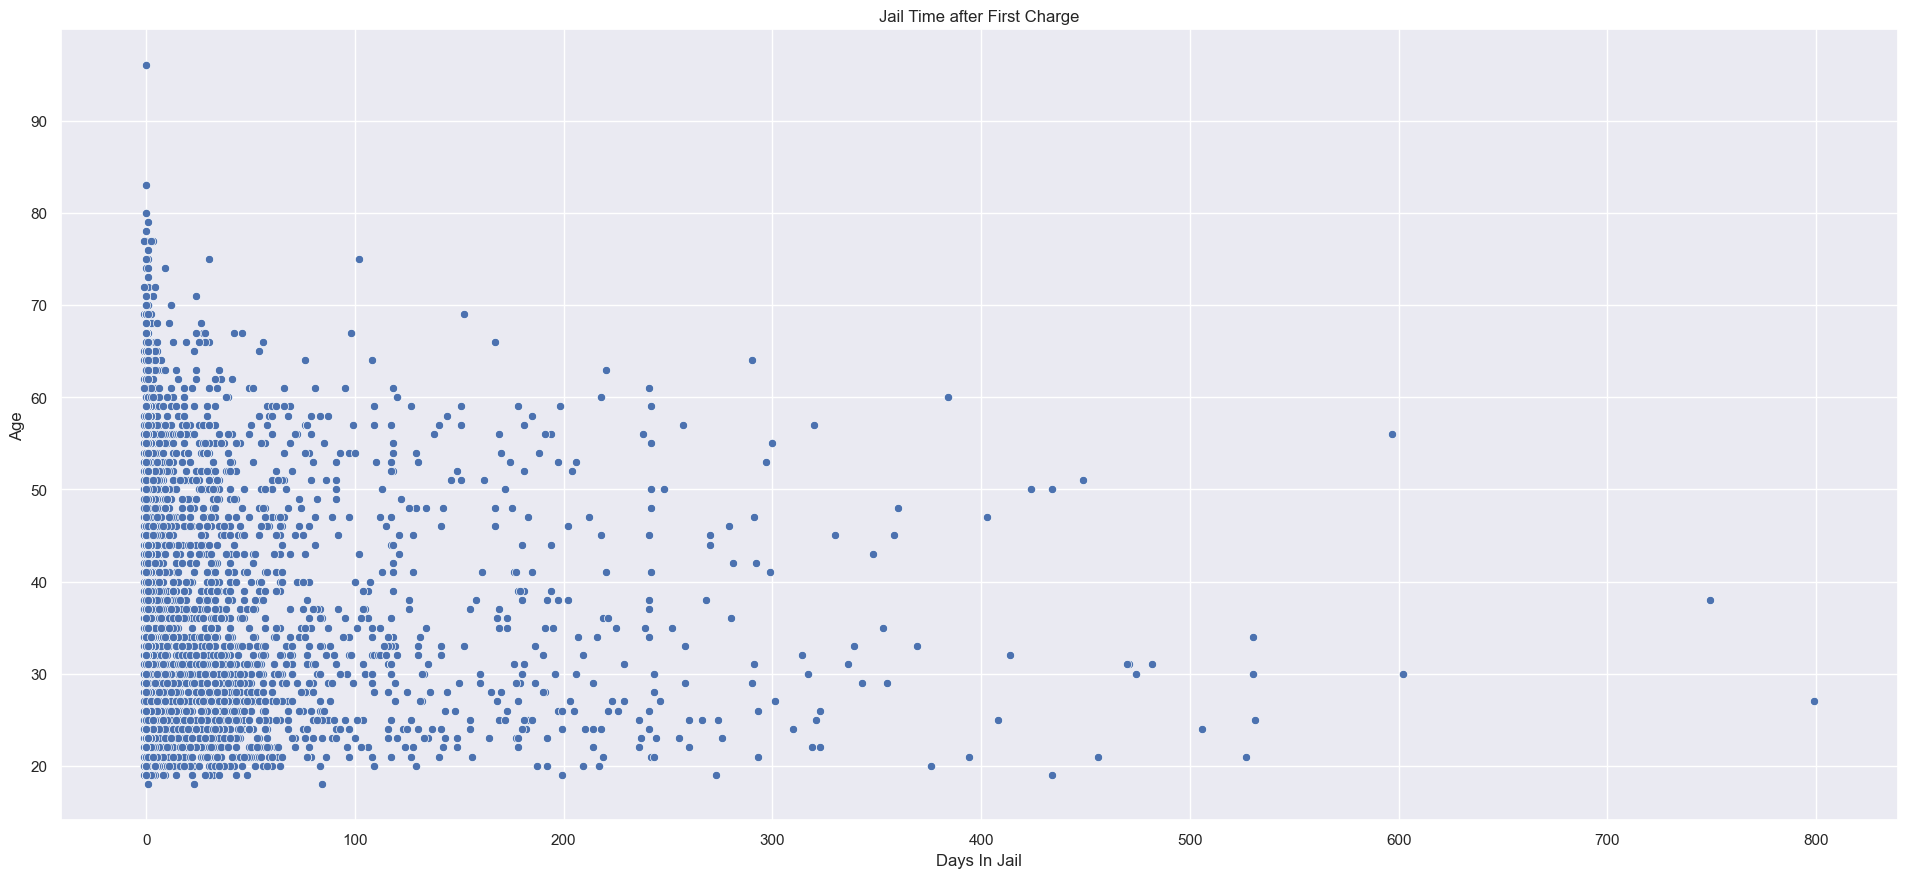

In [28]:
df['start_date'] = pd.to_datetime(df.iloc[:, 16], errors='coerce')
df['end_date'] = pd.to_datetime(df.iloc[:, 17], errors='coerce')
df['days_in_jail'] = (df['end_date'] - df['start_date']).dt.days.fillna(0).astype(int)
df.drop(['start_date', 'end_date'], axis=1, inplace=True)
SP = sns.scatterplot(data=df, x="days_in_jail", y="age")
SP.set(xlabel="Days In Jail", ylabel="Age", title="Jail Time after First Charge")
SP

Other: 377
African-American: 3696
Native American: 18
Hispanic: 637
Asian: 32
Caucasian: 2454


<AxesSubplot:xlabel='race', ylabel='count'>

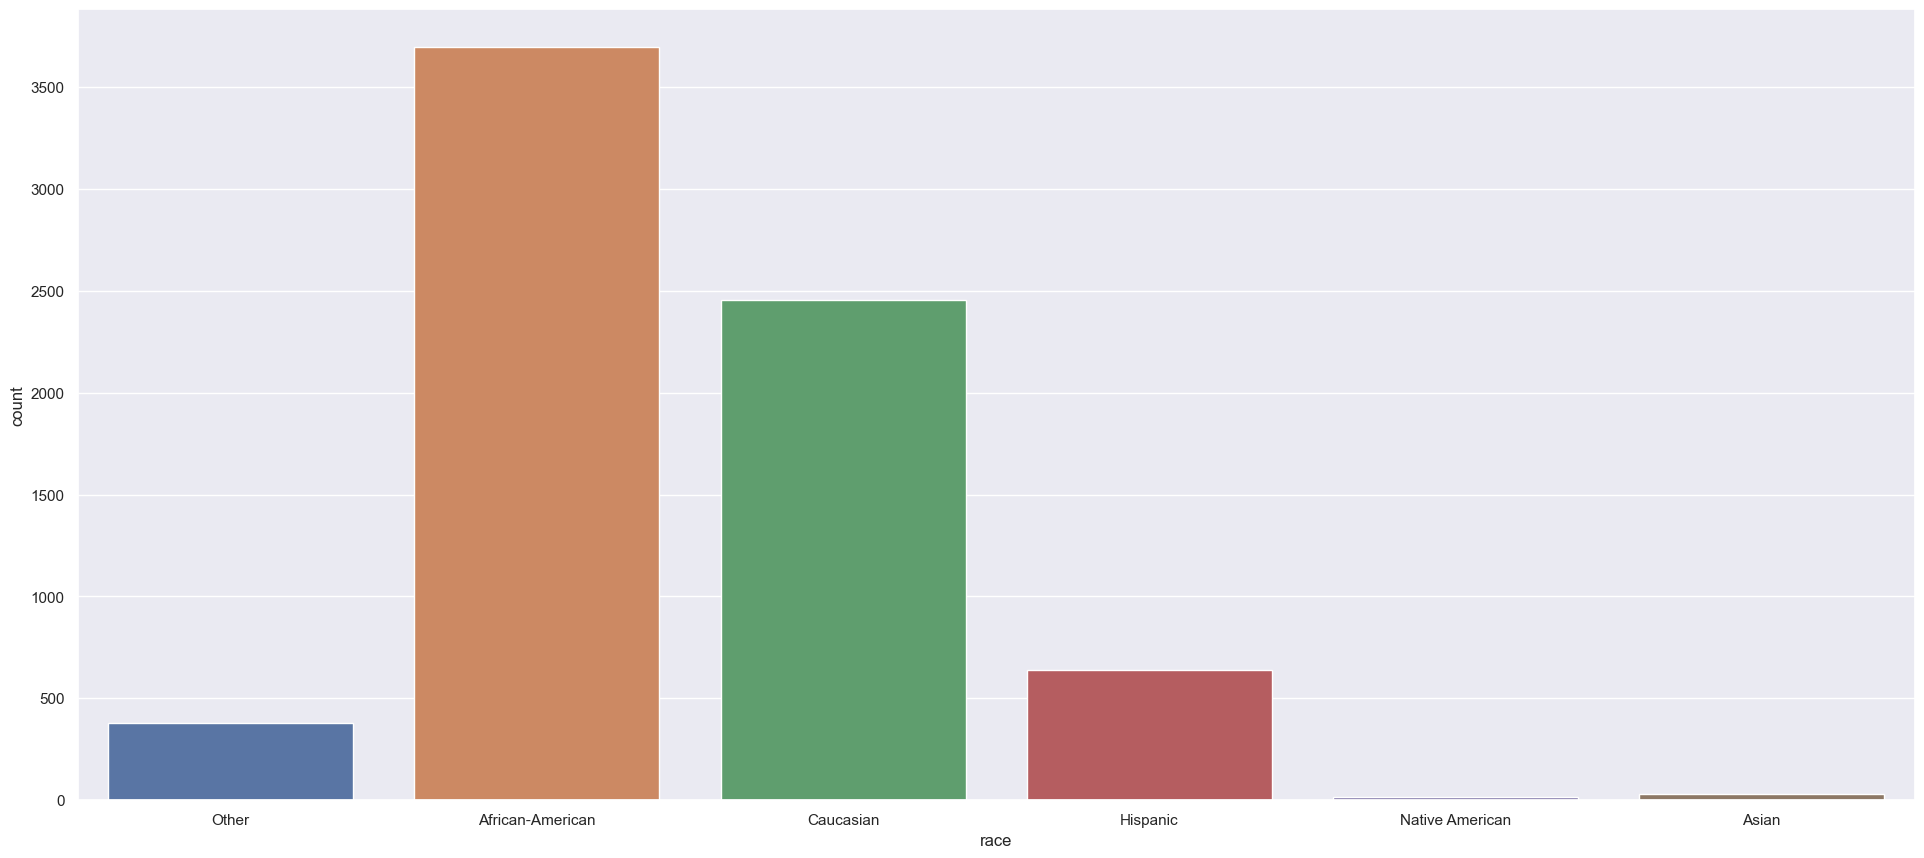

In [29]:
race_set = set(df["race"].unique())
race = list(race_set)

for i in race:
    count = df['race'].value_counts()[i]
    print(f'{i}: {count}')

sns.countplot(x=df["race"])

1: 1440
2: 941
3: 747
4: 769
5: 681
6: 641
7: 592
8: 512
9: 508
10: 383


<AxesSubplot:xlabel='decile_score', ylabel='count'>

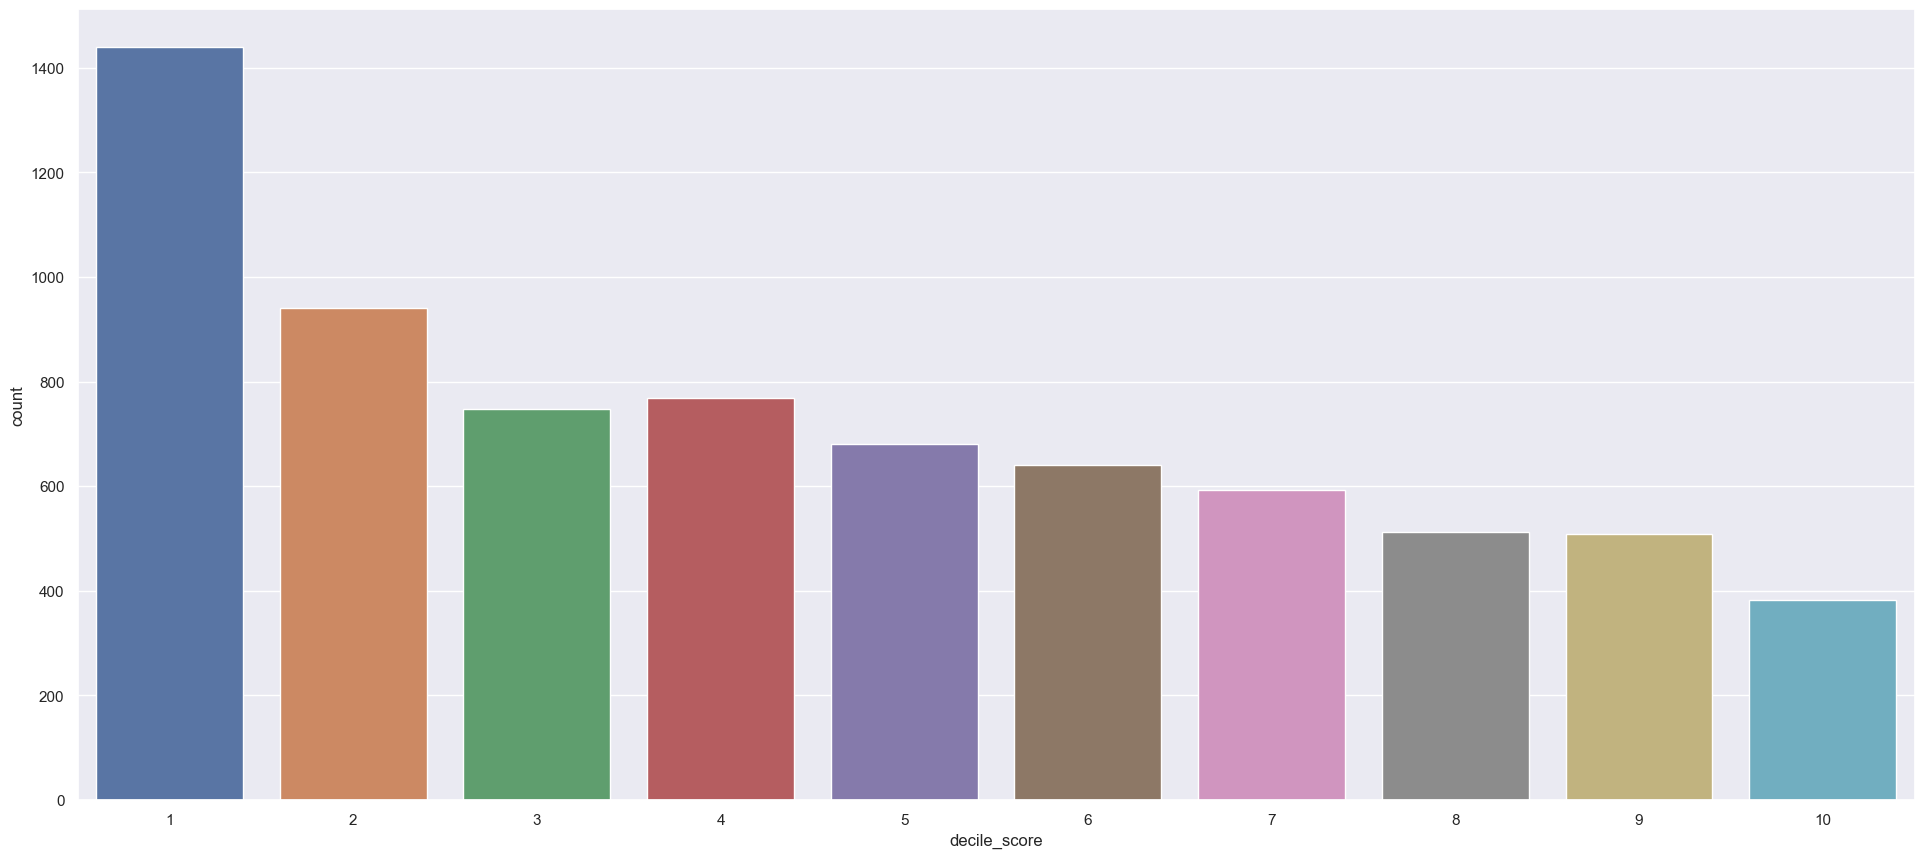

In [30]:
decile_score_set = set(df["decile_score"].unique())
decile_score = list(decile_score_set)

for i in decile_score:
    count = df['decile_score'].value_counts()[i]
    print(f'{i}: {count}')

sns.countplot(x=df["decile_score"])

<AxesSubplot:xlabel='decile_score', ylabel='count'>

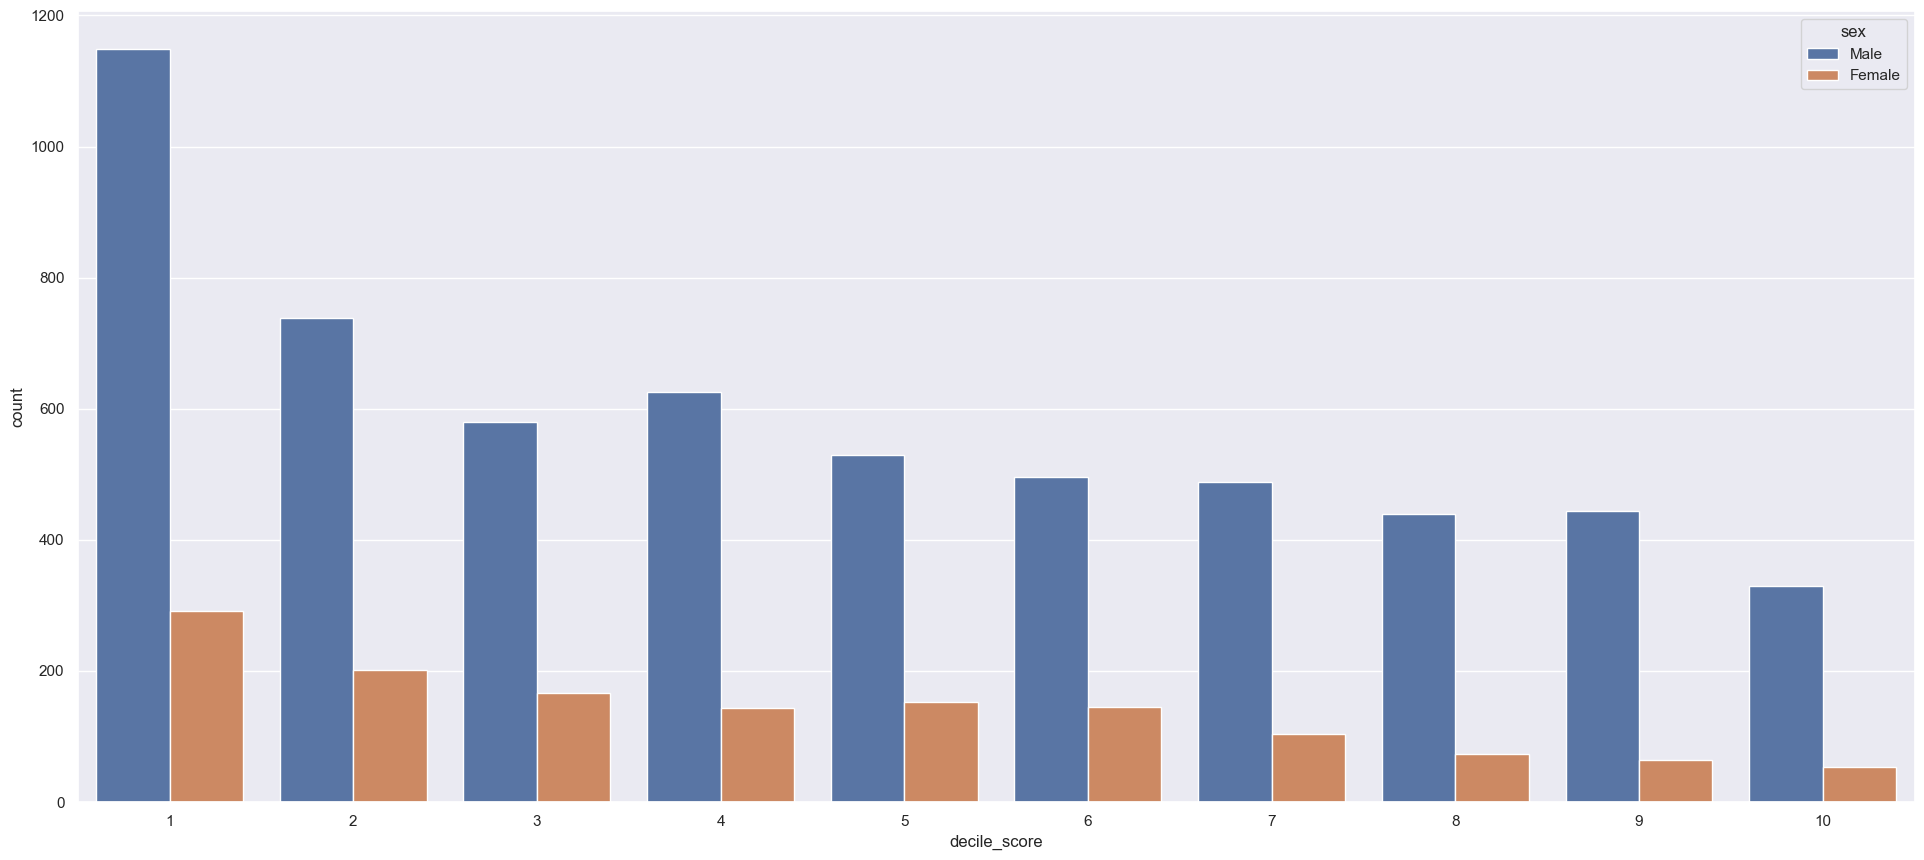

In [31]:
sns.countplot(x="decile_score", hue="sex", data=df)

<AxesSubplot:xlabel='age', ylabel='decile_score'>

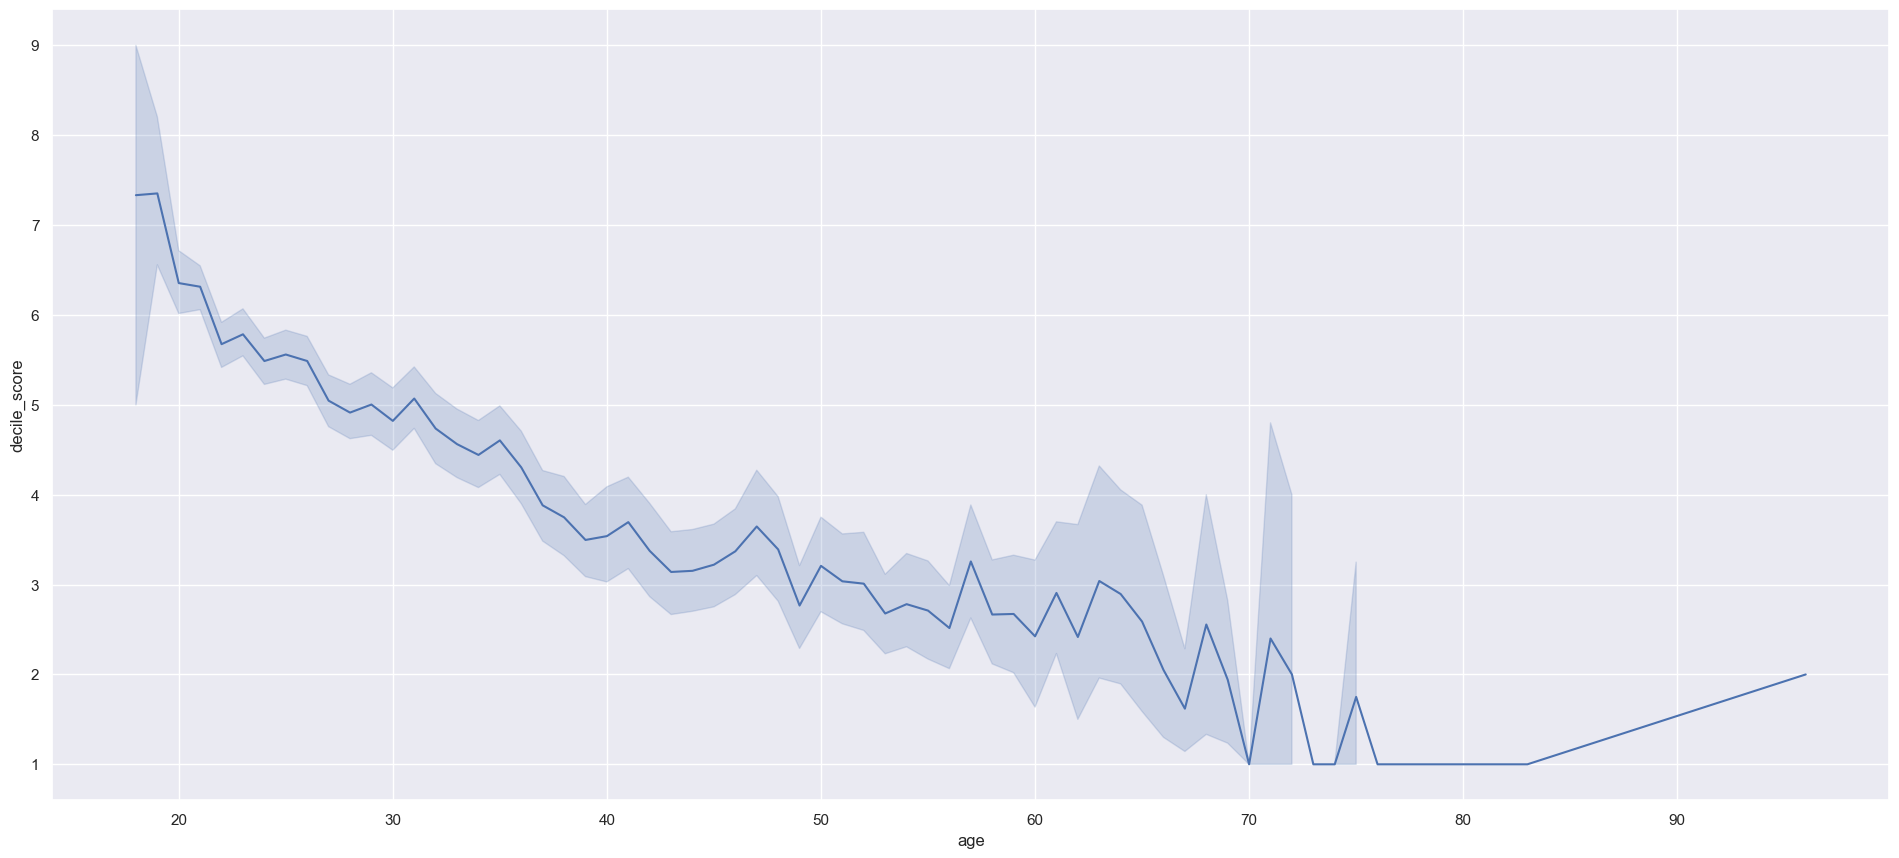

In [32]:
sns.lineplot(data=df, x="age", y="decile_score")

<AxesSubplot:xlabel='decile_score', ylabel='count'>

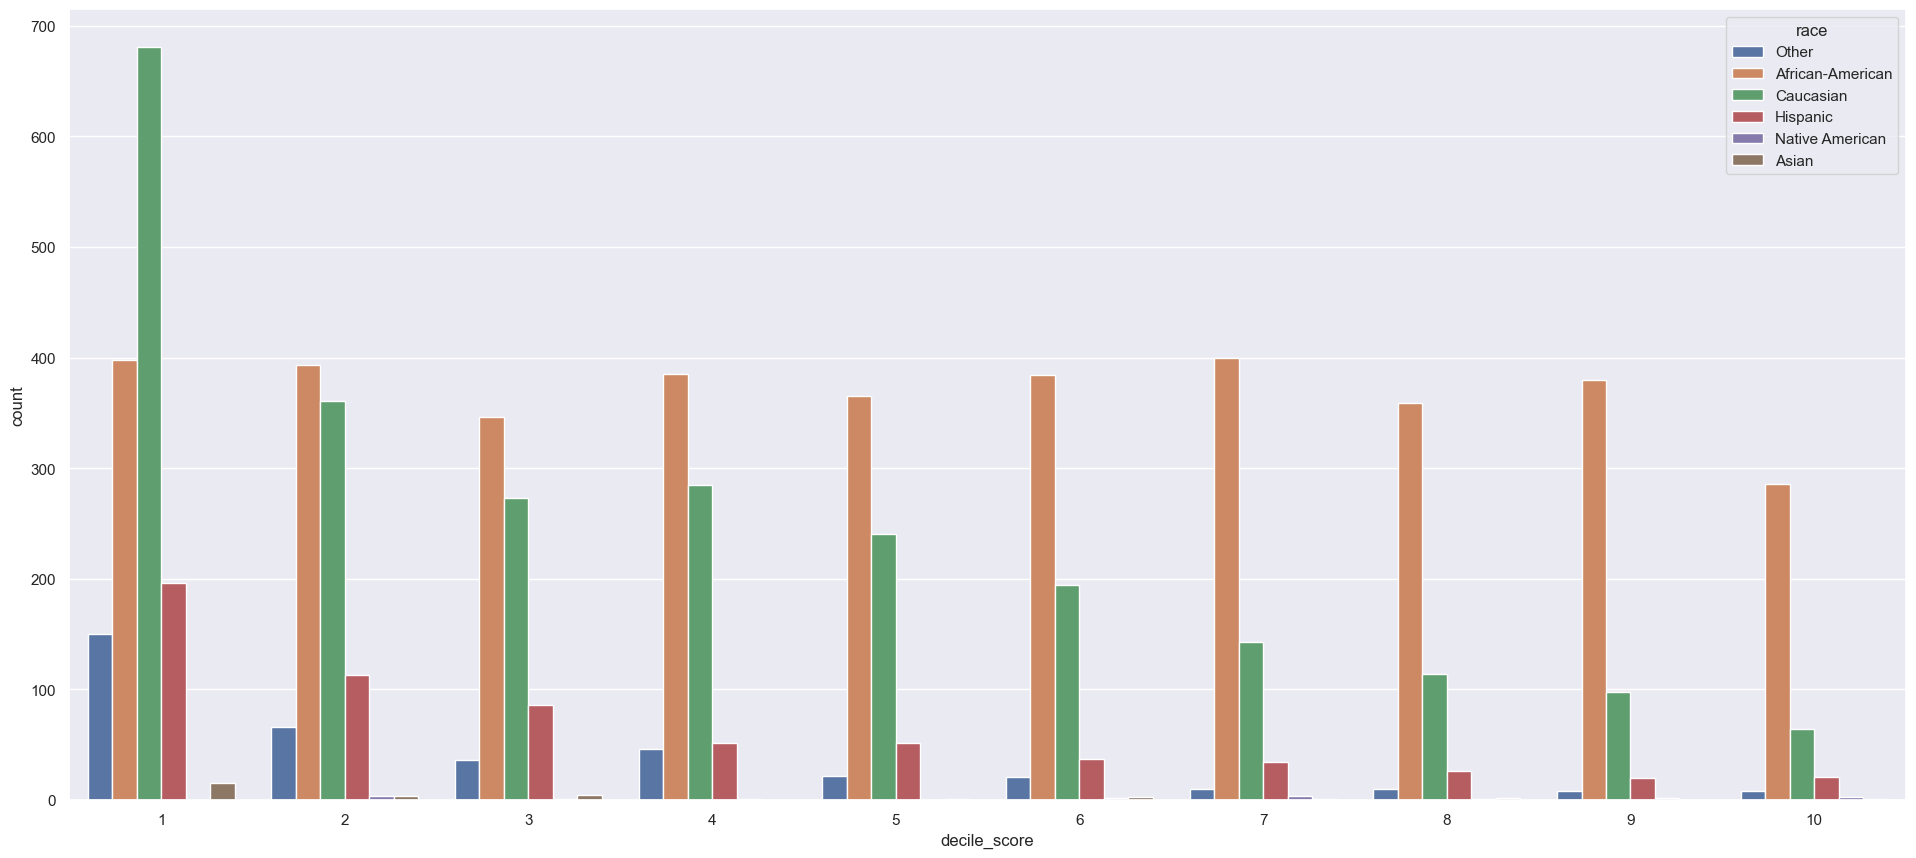

In [33]:
sns.countplot(data=df, x="decile_score", hue="race")

<AxesSubplot:xlabel='days_in_jail', ylabel='decile_score'>

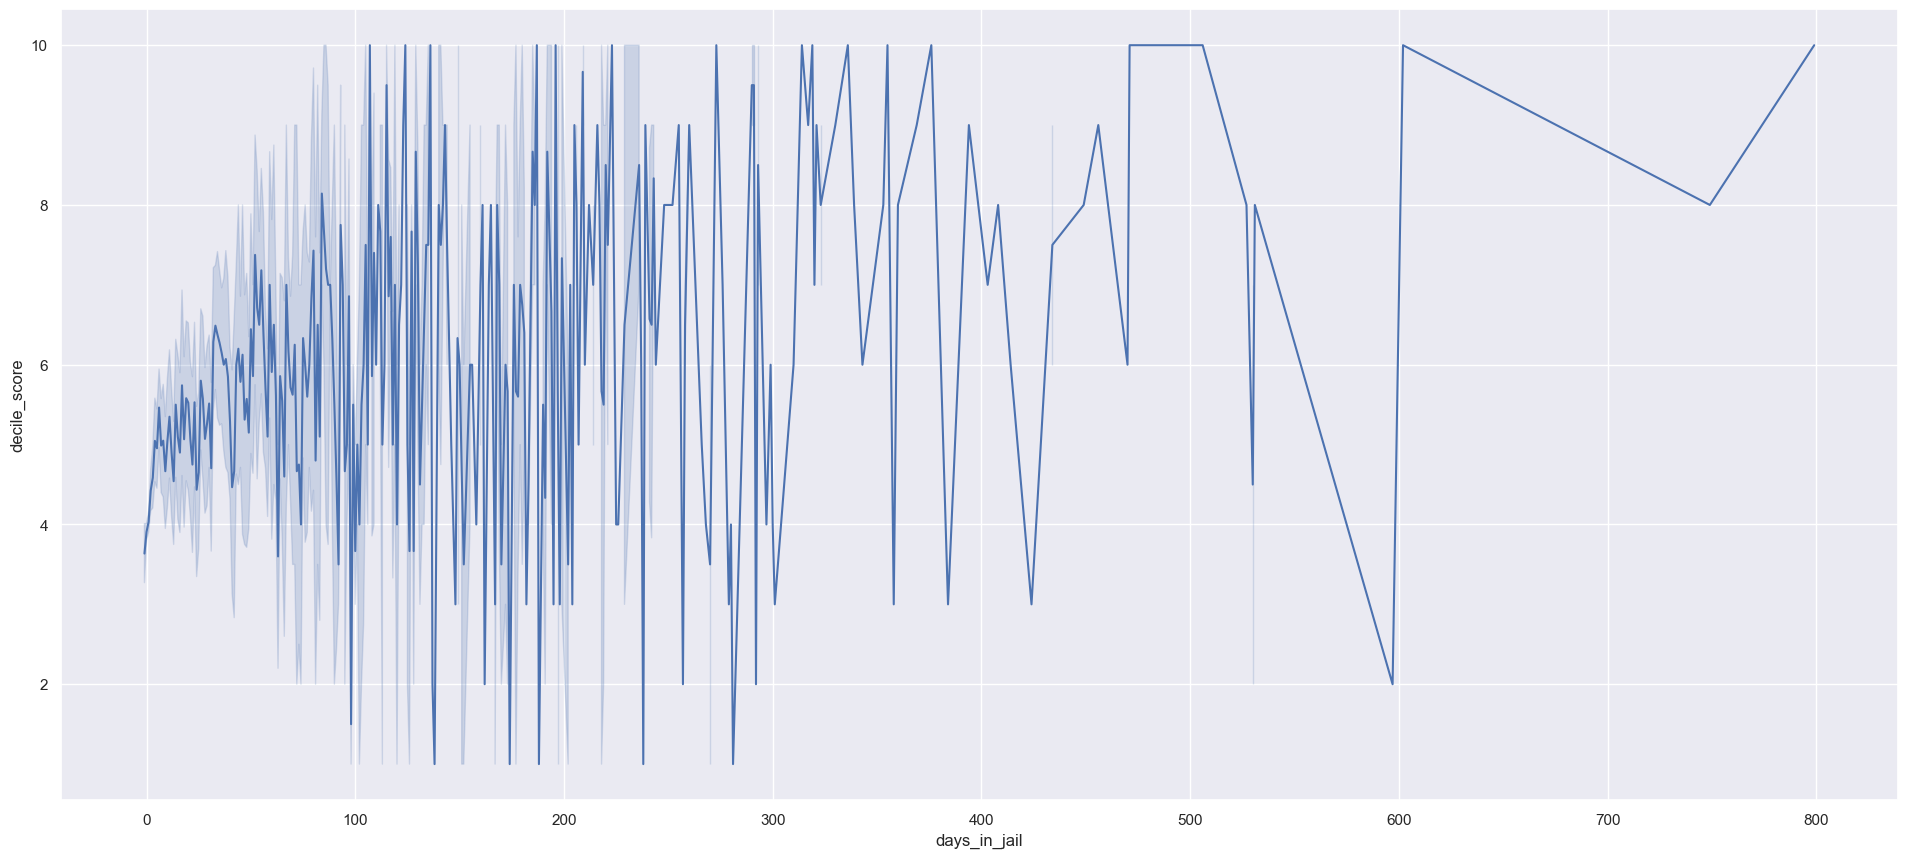

In [34]:
sns.lineplot(data=df, x="days_in_jail", y="decile_score")

<AxesSubplot:xlabel='decile_score', ylabel='days_in_jail'>

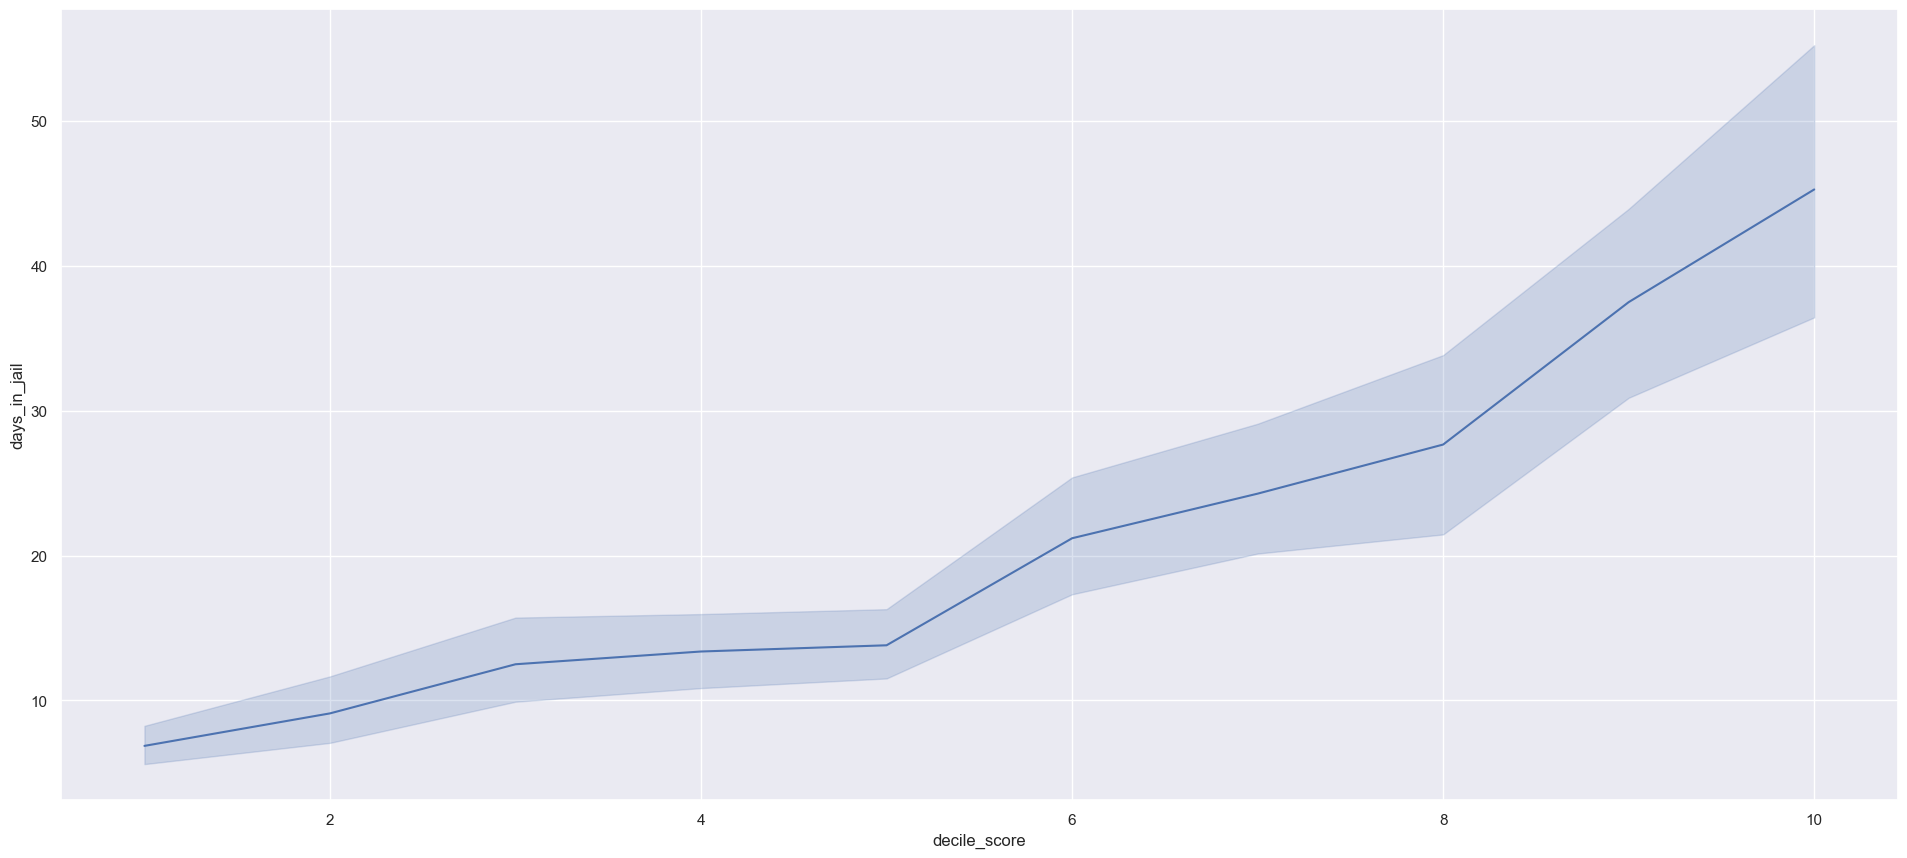

In [35]:
sns.lineplot(data=df, y="days_in_jail", x="decile_score")

1 miguel hernandez
3 kevon dixon
4 ed philo
5 marcu brown
6 bouthy pierrelouis
7 marsha miles
8 edward riddle
9 steven stewart
10 elizabeth thieme
13 bo bradac
14 benjamin franc
15 ellyaher lanza
16 kortney coleman
18 jarrod turbe
19 craig gilbert
20 samuel seraphin
21 mario hernandez
22 darrious davis
23 neil heckart
24 michael lux
25 columbus wilson
26 vandivuiet williams
27 nelson avalo
28 janel denicola
30 dominic pabon
32 russell sottile
33 andre ashley
37 deandrae counts
38 victoria soltau
39 najee sapp
40 victor moreno
41 william pirkle
42 maslin brutus
45 mark friedland
50 maurice watson
51 kurt fowks
52 michael tritsch
53 brooks nunez
54 walter atwell
55 darling madrano
56 kiante slocum
57 porfirio zamot
59 moises miranda
61 brenda plummer
64 derrick mims
66 jeffery dowdy
67 eddie jones
68 michael harper
69 anthony bennett
70 jeffrey pierre
71 joseph martorano
72 shinell baxterskeffrey
75 elliott knauff
77 graciela quevedo
79 mackenson nelson
80 trenton goldston
83 jonny romer

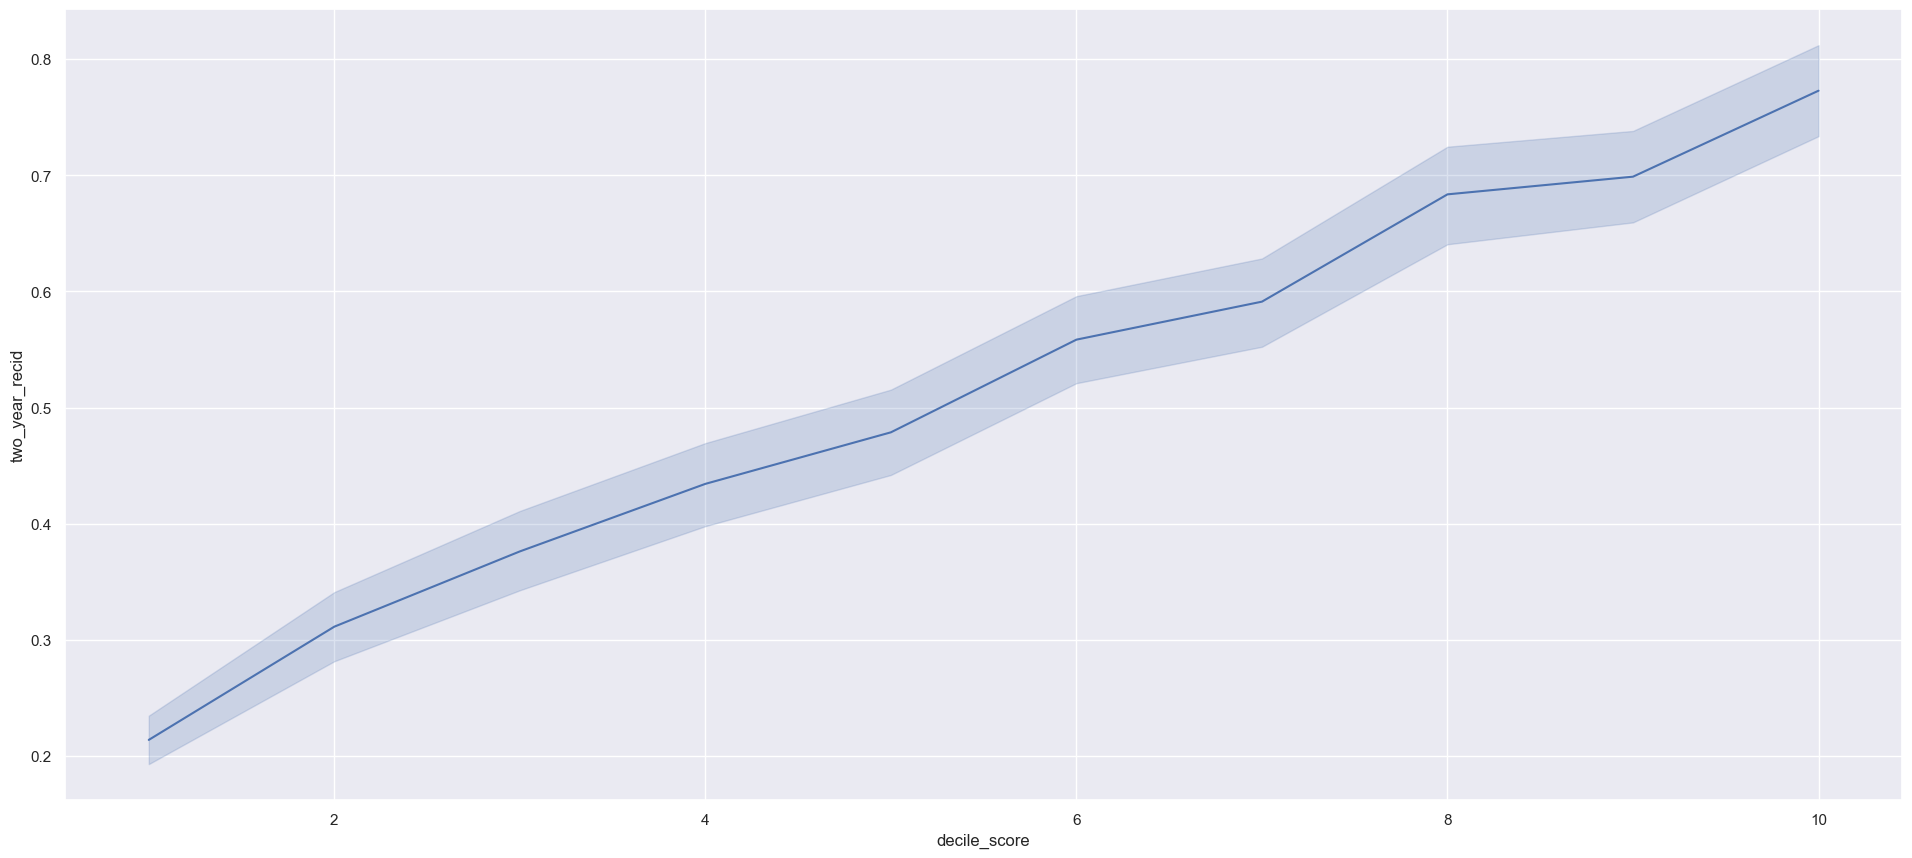

In [66]:
sns.lineplot(data=df, x="decile_score", y="two_year_recid")